# Ensemble Learning

## Initial Imports

In [1]:
#importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

## Read the CSV and Perform Basic Data Cleaning

In [4]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


## **Encoding Data using LabelEncoder**


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

label_encoder.fit(df["home_ownership"])
df["home_ownership"]=label_encoder.transform(df["home_ownership"])

label_encoder.fit(df["verification_status"])
df["verification_status"]=label_encoder.transform(df["verification_status"])

label_encoder.fit(df["pymnt_plan"])
df["pymnt_plan"]=label_encoder.transform(df["pymnt_plan"])

label_encoder.fit(df["application_type"])
df["application_type"]=label_encoder.transform(df["application_type"])

label_encoder.fit(df["hardship_flag"])
df["hardship_flag"]=label_encoder.transform(df["hardship_flag"])

label_encoder.fit(df["debt_settlement_flag"])
df["debt_settlement_flag"]=label_encoder.transform(df["debt_settlement_flag"])

label_encoder.fit(df["initial_list_status"])
df["initial_list_status"]=label_encoder.transform(df["initial_list_status"])

In [7]:
month_num={
    'Jan-2019':1,
    'Feb-2019':2,
    'Mar-2019':3,
    'Apr-2019':4,
    'May-2019':5,
    'Jun-2019':6,
    'Jul-2019':7,
    'Aug-2019':8,
    'Sep-2019':9,
    'Oct-2019':10,
    'Nov-2019':11,
    'Dec-2019':12
        
}

In [8]:
df['issue_d']=df['issue_d'].apply(lambda x:month_num[x])

In [10]:
df['next_pymnt_d']=df['next_pymnt_d'].apply(lambda x:month_num[x])

KeyError: 5

In [ ]:
df['issue_d'].value_counts()

In [ ]:
df.columns

## **Split the Data into Training and Testing**

In [11]:
# Create our features
X = df.drop(columns=["loan_status"])

# Create our target
y = df["loan_status"]

In [12]:
X.describe()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
count,68817.000000,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.0,68817.000000,68817.000000,...,68817.000000,68817.000000,68817.000000,68817.0,6.881700e+04,6.881700e+04,68817.000000,6.881700e+04,68817.0,68817.0
mean,16677.594562,0.127718,480.652863,1.812779,8.821371e+04,0.669994,1.726172,0.0,21.778153,0.217766,...,95.057627,30.626217,0.125972,0.0,2.100332e+05,6.133843e+04,29734.128558,5.572240e+04,0.0,0.0
std,10277.348590,0.048130,288.062432,0.941313,1.155800e+05,0.719105,0.743862,0.0,20.199244,0.718367,...,8.326426,33.631463,0.336732,0.0,1.928088e+05,5.738798e+04,26795.394232,5.095845e+04,0.0,0.0
min,1000.000000,0.060000,30.890000,0.000000,4.000000e+01,0.000000,1.000000,0.0,0.000000,0.000000,...,20.000000,0.000000,0.000000,0.0,3.600000e+03,2.350000e+02,100.000000,1.270000e+02,0.0,0.0
25%,9000.000000,0.088100,265.730000,1.000000,5.000000e+04,0.000000,1.000000,0.0,13.890000,0.000000,...,93.000000,0.000000,0.000000,0.0,6.697700e+04,2.650300e+04,11600.000000,2.288000e+04,0.0,0.0
50%,15000.000000,0.118000,404.560000,1.000000,7.300000e+04,1.000000,2.000000,0.0,19.760000,0.000000,...,100.000000,20.000000,0.000000,0.0,1.467100e+05,4.535700e+04,22100.000000,4.200000e+04,0.0,0.0
75%,24000.000000,0.155700,648.100000,3.000000,1.040000e+05,1.000000,2.000000,0.0,26.660000,0.000000,...,100.000000,50.000000,0.000000,0.0,3.036400e+05,7.657000e+04,39300.000000,7.249900e+04,0.0,0.0
max,40000.000000,0.308400,1676.230000,3.000000,8.797500e+06,2.000000,3.000000,0.0,999.000000,18.000000,...,100.000000,100.000000,4.000000,0.0,3.292782e+06,1.295455e+06,509400.000000,1.426964e+06,0.0,0.0


In [13]:
# Check the balance of our target values
y.value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [14]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test= train_test_split (X,y,random_state=1,stratify=y)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [15]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [16]:
# Fit the Standard Scaler with the training data
X_scalar=scalar.fit(X_train)

In [18]:
# Scale the training and testing data
X_train_scaled=X_scalar.transform(X_train)
X_test_scaled=X_scalar.transform(X_test)

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [19]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf_model.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(random_state=1)

In [20]:
# Calculated the balanced accuracy score
y_pred_rf = brf_model.predict(X_test_scaled)

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred_rf)

0.789264980198299

In [21]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_rf)

array([[   61,    26],
       [ 2099, 15019]])

In [22]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_rf))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.03      0.70      0.88      0.05      0.78      0.60        87
   low_risk       1.00      0.88      0.70      0.93      0.78      0.63     17118

avg / total       0.99      0.88      0.70      0.93      0.78      0.63     17205



In [29]:
# List the features sorted in descending order by feature importance
importances=brf_model.feature_importances_
sorted(zip(brf_model.feature_importances_,X.columns),reverse=True)

[(0.08231526271001346, 'total_rec_prncp'),
 (0.06608472280887584, 'total_pymnt_inv'),
 (0.06379006166303813, 'last_pymnt_amnt'),
 (0.05413470581469628, 'total_pymnt'),
 (0.04523445264906143, 'total_rec_int'),
 (0.026763074506444, 'int_rate'),
 (0.026255484486856096, 'issue_d'),
 (0.019707285361561452, 'annual_inc'),
 (0.01853865466117181, 'max_bal_bc'),
 (0.018019449352384163, 'mths_since_recent_inq'),
 (0.01776587080857185, 'dti'),
 (0.017633494385727554, 'installment'),
 (0.01704052929898447, 'mo_sin_old_rev_tl_op'),
 (0.016611984041585794, 'il_util'),
 (0.01610739877373857, 'total_bal_ex_mort'),
 (0.015619040200562961, 'bc_util'),
 (0.015527969333253157, 'all_util'),
 (0.014885097338360208, 'out_prncp'),
 (0.014790053658257805, 'revol_bal'),
 (0.014295026464150946, 'mths_since_recent_bc'),
 (0.014159496734743005, 'num_rev_accts'),
 (0.014121416399333042, 'out_prncp_inv'),
 (0.014058113197527233, 'tot_hi_cred_lim'),
 (0.01379277003461118, 'bc_open_to_buy'),
 (0.013631317104859096, 't

<AxesSubplot:title={'center':'Feature Importances'}, ylabel='1'>

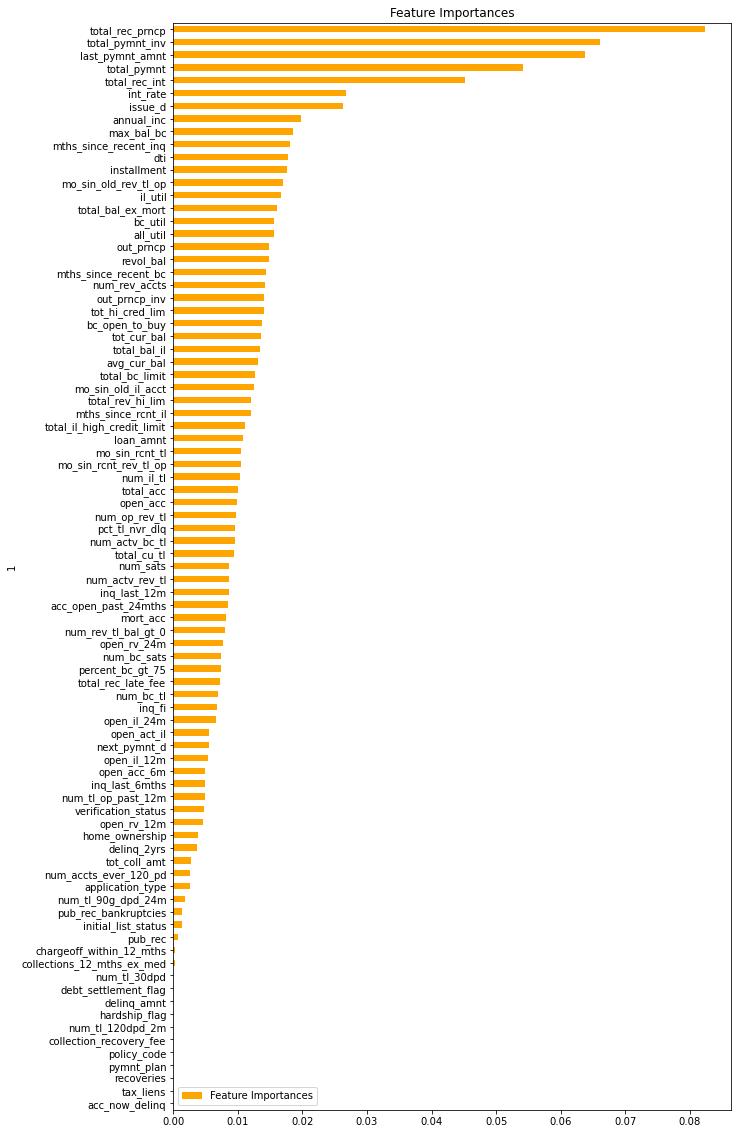

In [23]:
# Visualize the features of importances
importances_df=pd.DataFrame(sorted(zip(brf_model.feature_importances_,X.columns),reverse=True))
importances_df.set_index(importances_df[1],inplace=True)
importances_df.drop(columns=1,inplace=True)
importances_df.rename(columns={0:"Feature Importances"},inplace=True)
importances_sorted=importances_df.sort_values(by="Feature Importances")
importances_sorted.plot(kind='barh',color="orange",title="Feature Importances",figsize=(10,20))

### Easy Ensemble Classifier

In [24]:
# Train the Classifier
from imblearn.ensemble import EasyEnsembleClassifier

eec_model = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec_model.fit(X_train_scaled, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [25]:
# Calculated the balanced accuracy score
y_pred_eec = eec_model.predict(X_test_scaled)

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred_eec)

0.9323136363819492

In [26]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_eec)

array([[   80,     7],
       [  940, 16178]])

In [28]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_eec))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.08      0.92      0.95      0.14      0.93      0.87        87
   low_risk       1.00      0.95      0.92      0.97      0.93      0.87     17118

avg / total       0.99      0.94      0.92      0.97      0.93      0.87     17205



### Final Questions

1. Which model had the best balanced accuracy score?

    **Answer** Easy Ensemble Classifier had higher balanced accuracy score

2. Which model had the best recall score?

    **Answer** Easy Ensemble Classifier has higher recall score than Balanced Random Forest Classifier

3. Which model had the best geometric mean score?

    **Answer** Easy Ensemble classifier has higher geometric mean score, as both precision and recall are higher than Balanced Random Forest Classifier

4. What are the top three features?

   **Answer** The top features include -'total_rec_prncp','total_pymnt_inv','last_pymnt_amnt', 'total_pymnt'